# Lab 4 - Linear ODEs in the plane

### Name: 
### Lab section:

In [2]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import ode #ode solver package

### Producing phase plane plots via quiver
We are going to plot phase diagrams for linear ODEs that have the form

> $dx/dt = a*x + b*y$

> $dy/dt = c*x + d*y$

Python's ax.quiver() function allows you to display velocity 
vectors with arrows made of the components $(u,v)$, which is 
exactly what we need.
 
The function takes 4 inputs $(x,y,u,v)$. $x$ and $y$ are the grid points
(remember when you had to make these yourself for the slope field?). $u$
and $v$ are the $u$ and $v$ components of the vector, which are given by our
ODEs. 

In order to make the grid points $(x,y)$, we will use the function
np.meshgrid(). It's a pretty handy function that takes as input a range of
$x$ and $y$ values and returns two matrices $x$, $y$ that together give us the
grid points. Here is the code to produce a grid with an $x$ and $y$ 
range from (-1.5, 1.5) with a spacing of 0.2, we could do the following:

In [3]:
xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X,Y) #create a grid

Define the arrays dx and dy based on the ODE in order to compute the flow vectors on that grid. Here is a linear example:

In [5]:
a = -1
b = 0
c = 0
d = -1
dx = a*x+b*y #overwrites the other dx
dy = c*x+d*y #overwrites the other dy

Then plot the arrows given by arrays dx,dy at points x,y:

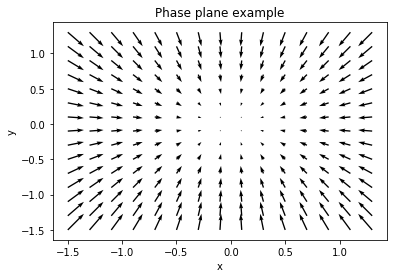

In [6]:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase plane example')
plt.show()


**Part 1: Analysis through eigenvalues**

For each of the six two-variable ODEs in problem set 4 do the following:

 - Produce a phase plane plot
 - Find the eigenvalues of the defining matrix and 
 - Classify the phase plane according to the eigenvalues.

**Q1.1:** matrix 1 from problem set 4

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.2:** matrix 1 from problem set 4

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.3:** matrix 1 from problem set 4

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.4:** matrix 1 from problem set 4

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.5:** matrix 1 from problem set 4

In [ ]:
#your code goes here

(your written answer goes here)

**Q1.6:** matrix 1 from problem set 4

In [ ]:
#your code goes here

(your written answer goes here)

### Part 2: Solutions using dopri5
Python has an entire suite of ode solvers. We'll use dopri5,
which uses the Runge-Kutta method. To do this, we define the ode
solver using a function we've written, set the solver's integrator to
'dopri5', set the parameters (a,b,c,d) and initial values, and integrate
inside a for loop to fill a matrix full of x and y values over time.

Here is the sample code:

/Users/dkon/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


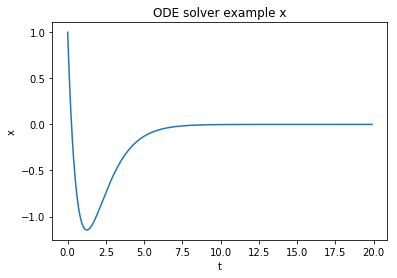

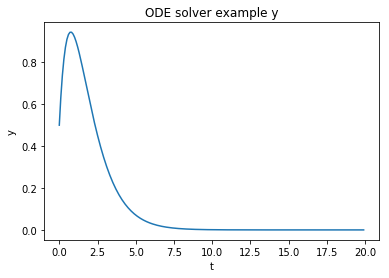

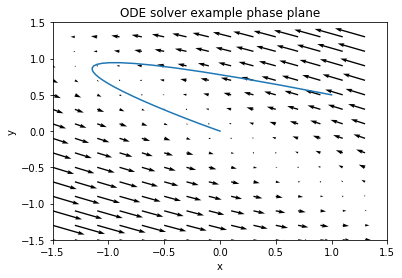

In [7]:
def fun(t, xy, a, b, c, d):
    newxy = [a*xy[0]+b*xy[1], c*xy[0]+d*xy[1]]
    return newxy

# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri45'.
solver = ode(fun)
solver.set_integrator('dopri5')


# Give the parameter values to the solver. This is passed to
# `fun` when the solver calls it.
a = -3
b = -4
c = 1
d = 1
solver.set_f_params(a,b,c,d)

# Set the initial values.
t0 = 0.0 #initial time
xy0 = [1, 0.5] #[intial x, initial y]
solver.set_initial_value(xy0, t0)

# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
t1 = 20
dt = .1
numsteps=int((t1-t0)/dt) #number of steps including the initial
t = np.arange(t0, t1, dt)
sol = np.zeros((numsteps, 2))
sol[0] = xy0

# Repeatedly call the `integrate` method to advance the
# solution to time t[i], and save the solution in sol[i].
for i in range(numsteps):
    solver.integrate(t[i])
    sol[i] = solver.y
    

# Plot the solution...
plt.plot(t, sol[:,0])
plt.xlabel('t')
plt.ylabel('x')
plt.title('ODE solver example x')
plt.show()

plt.plot(t, sol[:,1])
plt.xlabel('t')
plt.ylabel('y')
plt.title('ODE solver example y')
plt.show()


xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid
    
dx = a*x+b*y
dy = c*x+d*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
ax.plot(sol[:,0], sol[:,1]) #
plt.xlabel('x') #use more informative labels for a real model
plt.ylabel('y')
plt.title('ODE solver example phase plane')

plt.show()



TO DO: 
Modify the code provided above
to solve the ODEs, then put a *for loop* around the code in order
to plot 6 separate solution trajectories starting from six initial
conditions which you set as two vectors before the loop begins. Your
results for each model should include: 
 
 - overlay the phase portrait with 6 different trajectories
 - plot 6 solutions of X in one window and 6 solutions of Y in another
 - comment on where *each variable* (X and Y) of the solution ends up, and whether/how it depends on the intial values
 - comment on how the classification you provided in part 1 is reflected in the dynamics of the solution trajectories

Q2.1-6: Use the same models that you used in Q1.1-6.

**Q2.1:**

In [ ]:
#your code goes here

(your written answer goes here)

**Q2.2:**

In [ ]:
#your code goes here

(your written answer goes here)

**Q2.3:**

In [ ]:
#your code goes here

(your written answer goes here)

**Q2.4:**

In [ ]:
#your code goes here

(your written answer goes here)

**Q2.5:**

In [ ]:
#your code goes here

(your written answer goes here)

**Q2.6:**

In [ ]:
#your code goes here

(your written answer goes here) 

### Part 3: Analyzing relationship dynamics
Suppose person $A$ and person $B$ are in a romantic relationship and their
feelings (positive or negative) are described the system of linear ODEs:

>   $dA/dt = a*A + b*B$

>   $dB/dt = c*A + d*B$

in which $a$ and $d$ are the self-awareness parameters and $b$ and $c$ are the
parameters of responsiveness to the other. Analyze the following
scenarios by *a)* calculating the eigenvalues (for a particular set of
parameter values), *b)* plotting the solutions in the phase plane, *c)*
descibing the possible future dynamics of the relationship. 

**Q3.1:** $A$ and $B$ are opposite: $a$ = $-d$ and $b$ = $-c$. Describe the possible
dynamics and plot example solution trajectories.

In [ ]:
#your code goes here

c) (your written answer goes here)

**Q3.2:** $A$ and $B$ have identical responsiveness $b=c$ to each other, but $A$ has
positive self-awareness $(a>0)$ while $B$ has negative self-awareness $(d<0)$.

In [ ]:
#your code goes here

c) (your written answer goes here) 

**Q3.3:** $A$ is a detached lover $(a<0, b=0)$ and $B$ is an eager beaver $(c>0, d>0)$.

In [ ]:
#your code goes here

c) (your written answer goes here)

**Q3.4:** $A$ is a contrarian counterpart $(a>0, b<0)$ and $B$ is a malevolent
misanthrope $(c<0, d<0)$.

In [ ]:
#your code goes here

c) (your written answer goes here) 

### Rubric

**Part 1**
 - Q1.1-6 - 3 pts each: code (1), plot (1), classification of ODE (1)

**Part 2**
 - Q2.1-6 - 6 pts each: code (1), phase plots with 6 trajectories (1), plot of 6 x and y solutions (2), description of where each coordinate ends up (1), comparison with the classification (1)

**Part 3**
 - Q3.1-4 - 24 pts total: code (1), eigenvalues (1), phase plane plot (2), description of the future dynamics (2) 

*Total: 78 points*

MAKE SURE YOUR CODE RUNS BEFORE SUBMITTING IT